In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.neural_network import MLPRegressor
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=123)

In [11]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16000) reached and the optimization hasn't converged yet.
  w

1000 0.8135618481563726 9.455334901809692
6000 0.8676062075729001 50.369872093200684
11000 0.8652404829956772 96.96184015274048
16000 0.8607359540405662 138.92485308647156
21000 0.8571120974009757 184.3439679145813
26000 0.8560277084680104 196.52611303329468
31000 0.8560277084680104 203.2255620956421
36000 0.8560277084680104 209.10585594177246
41000 0.8560277084680104 208.54308891296387
46000 0.8560277084680104 197.78700304031372
51000 0.8560277084680104 201.6317880153656
best_val   =  6000
best_score =  0.8676062075729001


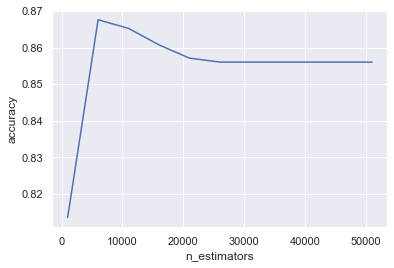

In [3]:
from sklearn.neural_network import MLPRegressor

scores = []
best_val = 0
best_score = 0
maxIters = np.arange(1000, 52000, 5000)

for maxIter in maxIters:
    start_time = time.time()
    model = MLPRegressor(max_iter=maxIter, random_state=123)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = maxIter
    print(maxIter, score, used_time)

fig = sns.lineplot(x=maxIters, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

In [4]:
#35000 Iterationen sollten für das erreichen es Optimums genügen

start_time = time.time()
model = MLPRegressor(max_iter=35000, solver= 'adam', random_state=123, activation='relu')
model.fit(X_train_sc, y_train)
score = model.score(X_test_sc, y_test)
used_time = time.time() - start_time
print(score, used_time)

0.8560277084680104 197.06419038772583


10 0.8554633384779667 155.94157600402832
20 0.8587306323047664 104.13508677482605
30 0.8459894892368608 128.24607610702515
40 0.8624898321336263 105.52019596099854
50 0.861657267270596 93.83267211914062
60 0.858176044207005 153.4552619457245
70 0.8626582397954772 125.2725920677185
80 0.8615636525636532 191.05403804779053
90 0.8672171184331745 67.99517107009888
100 0.858572537186322 207.73838901519775
110 0.859516358537807 184.78057384490967
120 0.8533679455437597 260.47557497024536
130 0.8484515430359975 268.1589410305023
140 0.8339704543484059 280.4204978942871
best_val   =  90
best_score =  0.8672171184331745


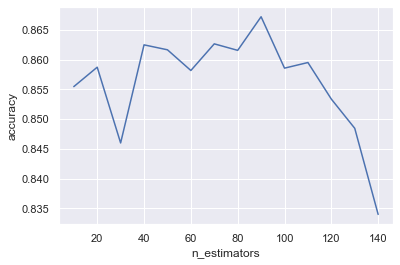

In [12]:
# Die "relu" activation ergibt die Besten Werte
scores = []
best_val = 0
best_score = 0
batch_sizes = np.arange(10, 150, 10)

for batch_size in batch_sizes:
    start_time = time.time()
    model = MLPRegressor(max_iter=35000, random_state=123, batch_size=batch_size)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = batch_size
    print(batch_size, score, used_time)

fig = sns.lineplot(x=batch_sizes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

In [ ]:
# best batchsize is 90
